Here we narrow down the datasets to actual shops that have a focus on coffee.  We use the fraction of reviews mentioning coffee (./ProcessedData/freqcoffeeterms_reviews.csv) to assess this.  We set a cutoff using the values for the cutoff.  The narrowed list of reviews and shops is saved in ./ProcessedData with the suffix '_withcfcutoff'

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import descartes

#For creating interactive maps
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster

#Let's look at the distribution of the coffee shops on a map
# import libraries
import geopandas as gpd
from shapely.geometry import Point, Polygon
import matplotlib.pyplot as plt

In [8]:
csfreqsumm = pd.read_csv('./ProcessedData/freqcoffeeterms_reviews.csv')
shops = pd.read_csv('./ProcessedData/shops_withcategoriesgeoms.csv')
print(csfreqsumm.shape)
print(shops.shape)
#Joining based on the name of the coffee shop, so different locations have the same name
#print(csfreqsumm.head(3))
#print(shops.head(3))

shops = pd.merge(shops,csfreqsumm,how='inner',on = ['alias'])
print(shops.head(2))
print(shops.shape)


(815, 4)
(1447, 13)
                       id            name                      alias  \
0  lWOkeS-wV4no8qqA9OwwEg  Doughnut Plant  doughnut-plant-new-york-6   
1  UZViRVpxNZvOM5KarmbT1g    Sweet Moment      sweet-moment-new-york   

   is_closed                                         categories  review_count  \
0      False  [{'alias': 'donuts', 'title': 'Donuts'}, {'ali...          3213   
1      False  [{'alias': 'coffee', 'title': 'Coffee & Tea'},...           822   

  price  rating            transactions   latitude  longitude  \
0    $$     4.5  ['pickup', 'delivery']  40.716394  -73.98861   
1    $$     4.5                      []  40.717630  -73.99714   

                                     geometry  \
0  POINT (-73.9886098620298 40.7163944930004)   
1                  POINT (-73.99714 40.71763)   

                             catlist  numcoffeemen  numreviews   fraccof  
0               ['coffee', 'donuts']          16.0          60  0.266667  
1  ['coffee', 'icecream',

In [9]:
#Removing coffeeshops with fewer than 15 reviews scraped from yelp. 
#This leaves '615' coffee shops in our dataset
print(shops.numreviews.value_counts().head(20))
shops = shops[shops.numreviews>=15]
print(shops.shape)
print(np.random.uniform(0.01))

40    388
60     68
1      31
20     20
2      19
8      15
7      13
9      12
3      10
12     10
18      9
5       9
6       9
15      9
13      9
24      8
4       8
30      8
14      7
26      7
Name: numreviews, dtype: int64
(615, 16)
0.1584231664258583


0.0


Text(0, 0.5, 'Yelp rating')

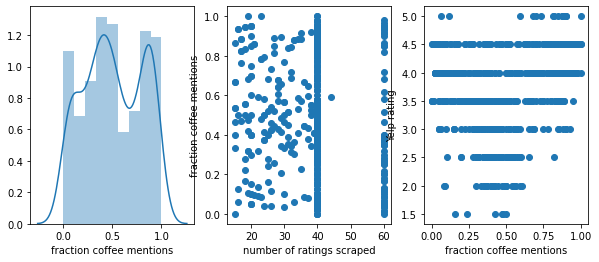

In [15]:
#Visualizing the distribution of the coffee-mention fraction
fig, axs = plt.subplots(ncols=3, figsize=(10, 4))


sns.distplot(shops.fraccof,ax=axs[0])
axs[0].set_xlabel('fraction coffee mentions')

print(min(shops.fraccof))
axs[1].scatter(x= shops.numreviews,y=shops.fraccof)
axs[1].set_xlabel('number of ratings scraped')
axs[1].set_ylabel('fraction coffee mentions')


axs[2].scatter(x = shops.fraccof, y = shops.rating)
axs[2].set_xlabel('fraction coffee mentions')
axs[2].set_ylabel('Yelp rating')

The effect of the discrete nature of reviews on fraction is pretty obvious at smaller total numbers of reviews (middle graph). (Right graph) For coffee shops in which there is a higher frequency of coffee mentions, the lower end of mean ratings also increases. One possible explanation is that at places that focus on coffee and draw customers focused on coffee, the customers know what to expect.  For places with very few mentions of coffee (< 0.1), the ratings also appear to be higher)

(Left plot), There appear to be peaks for the mentions of coffee in reviews. The middle peak has a sharp dropoff above 0.5.  There is also a sharp peak at 0.9. Could these represent different strategies for targeting customers - A diversified approach and a coffee-focused approach (along with drawing coffee focused vs generalist customers)? Starbucks clearly falls in the middle category.

0.3


Text(0, 0.5, 'Yelp rating')

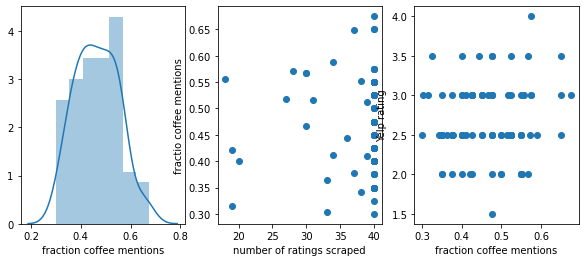

In [19]:
#Use fraction of coffee shop mentions in Starbucks reviews to come up with a cutoff for coffeeshop mentions
sb = shops[shops.name=='Starbucks']
fig, axs = plt.subplots(ncols=3, figsize=(10, 4))


sns.distplot(sb.fraccof,ax=axs[0])
axs[0].set_xlabel('fraction coffee mentions')

print(min(sb.fraccof))
axs[1].scatter(x= sb.numreviews,y=sb.fraccof)
axs[1].set_xlabel('number of ratings scraped')
axs[1].set_ylabel('fractio coffee mentions')


axs[2].scatter(x = sb.fraccof, y = sb.rating)
axs[2].set_xlabel('fraction coffee mentions')
axs[2].set_ylabel('Yelp rating')



In [27]:
#Removing all shops with coffee mentioned in less than 30% of reviews.  
#We only care about coffeeshops where coffee is mentioned as much as at Starbucks.
shops = shops[shops.fraccof >= 0.29]
shops.to_csv('./ProcessedData/coffeeshops_withcfcutoff.csv',index=False)



In [31]:
print(shops.shape)
459*15
shops.name.value_counts().head(50)

(459, 16)


Starbucks                         87
Dunkin'                           32
Pret A Manger                     21
Gregorys Coffee                   14
Bluestone Lane                    11
La Colombe Coffee                  8
Think Coffee                       6
Matto Espresso                     6
Joe Coffee Company                 6
Blue Bottle Coffee                 6
Le Pain Quotidien                  6
Gasoline Alley Coffee              3
Brooklyn Roasting Company          3
Cha Cha Matcha                     3
Ninth Street Espresso              3
JOE & THE JUICE                    3
Birch Coffee                       3
Caffe Bene                         3
Cafe Grumpy                        3
Bean & Bean                        2
Culture Espresso                   2
Third Rail Coffee                  2
Seven Grams Caffe                  2
Banter                             2
Stumptown Coffee Roasters          2
Kaigo Coffee Room                  2
787 Coffee                         2
C

The good things is that now, places like McDonald's and 7-11 are no longer on the list. We have places whose main focus is on selling coffee.

In [32]:
full_data = gpd.read_file("./BoroughBoundaries/geo_export_95c5197b-fade-4aaa-afbb-4566e043f401.shp")

In [33]:
#The map has crs = epsg:4326
full_data.head(10)
type(full_data)
print(full_data.total_bounds)
print(full_data.crs)


[-74.25559136  40.4961154  -73.70000906  40.91553278]
epsg:4326


Plotting the coffee related businesses on the map

In [35]:
ax = full_data.plot(figsize=(10,10),color='none',edgecolor='gainsboro')
ax.set_xlim(-74.03, -73.925)
ax.set_ylim(40.7, 40.85)

crs = {'init':'epsg:4326'}
geometry = [Point(xy) for xy in zip(shops.longitude, shops.latitude)]
shopsgdf = gpd.GeoDataFrame(shops,geometry=geometry)
shopsgdf.crs = crs
shopsgdf.plot(color='maroon',markersize=1,ax=ax)
#ax.set_title('Coffeeshop dataset')

/Users/thomasyoung/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


Most coffee related businesss are cheap

$$     0.570439
$      0.424942
$$$    0.004619
Name: price, dtype: float64

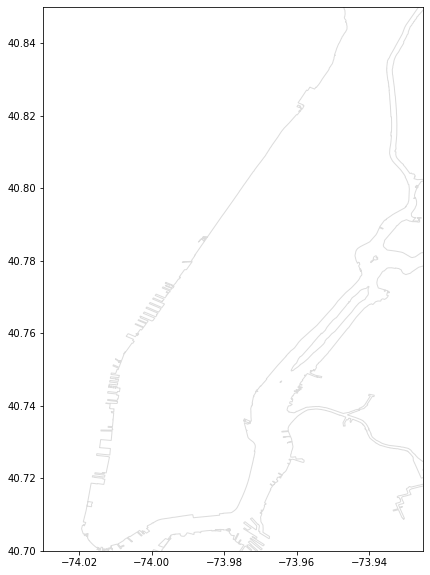

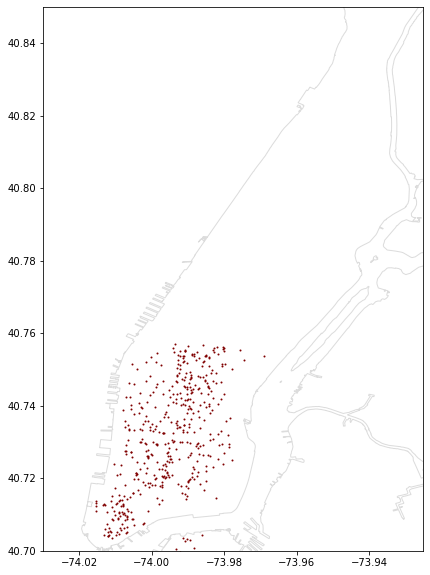

In [36]:
shops.price.value_counts()/sum(shops.price.value_counts())

About 45% have an average rating > 4. 60% have a rating over 3.5.

1.5    0.008715
2.0    0.056645
2.5    0.108932
3.0    0.119826
3.5    0.169935
4.0    0.333333
4.5    0.174292
5.0    0.028322
Name: rating, dtype: float64


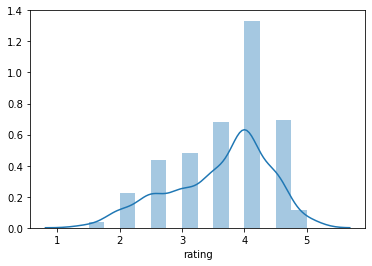

In [40]:
print(shops.rating.value_counts().sort_index()/sum(shops.rating.value_counts()))
sns.distplot(shops.rating)

All shops are opened

In [41]:
shops.is_closed.value_counts()

False    459
Name: is_closed, dtype: int64

There is a single peak for number of yelp reviews at about 120.  THis is the average.  There is some skew in the tail

159.34640522875816

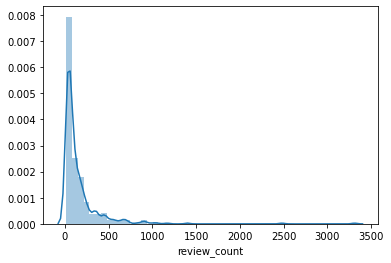

In [42]:
sns.distplot(shops.review_count)
np.mean(shops.review_count)


As expected from statistics, when there are fewere reviews, there is more variability in the average rating. At the same we we would expected more reviews to correlate with higher ratings, since higher ratings can help to drive business.

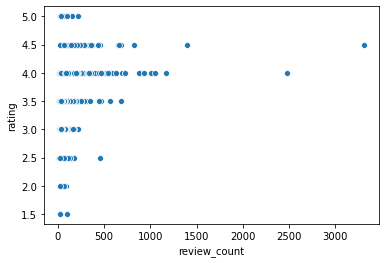

In [43]:
sns.scatterplot(x=shops.review_count,y=shops.rating)

Creating an interactive map with folium

In [44]:
#Plotting individual coffeeshops color coded by review

In [45]:
m_1 = folium.Map(location=[40.74,-73.98],tiles='cartodbpositron',zoom_start=13)

#add shops to the map, color coded by price

def color_producer(val):
    if val == '$':
        return 'yellow'
    if val == '$$':
        return 'darkred'
    if val == '$$$':
        return 'black'
    if val == '$$$$':
        return 'blue'
    
for i in range(0,len(shops)):
    Circle(
        location=[shops.iloc[i]['latitude'],shops.iloc[i]['longitude']],
        radius = 20, 
        color = color_producer(shops.iloc[i]['price'])).add_to(m_1)
    
#display the map
m_1



In [46]:
shops.head(10)

,id,name,alias,is_closed,categories,review_count,price,rating,transactions,latitude,longitude,geometry,catlist,numcoffeemen,numreviews,fraccof
1,UZViRVpxNZvOM5KarmbT1g,Sweet Moment,sweet-moment-new-york,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",822,$$,4.5,[],40.717630,-73.997140,POINT (-73.99714 40.71763),"['coffee', 'icecream', 'waffles']",31.0,60,0.516667
2,nOCjslrdcKBQQYgD5qUs9Q,Kam Hing Coffee Shop,kam-hing-coffee-shop-new-york-2,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",645,$,4.5,[],40.718248,-73.999004,POINT (-73.99900 40.71825),"['bakeries', 'coffee']",23.0,60,0.383333
4,0rQz8mkleT62eUkiAVs4UA,Russ & Daughters Cafe,russ-and-daughters-cafe-new-york-5,False,"[{'alias': 'bagels', 'title': 'Bagels'}, {'ali...",1004,$$,4.0,[],40.719625,-73.989576,POINT (-73.98958 40.71963),"['bagels', 'coffee', 'delis']",22.0,60,0.366667
9,8zIXMsbcDS7kqH8N-09zLg,Cha Cha Matcha,cha-cha-matcha-new-york-8,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",907,$$,4.0,[],40.720066,-73.996261,POINT (-73.99626 40.72007),['coffee'],22.0,60,0.366667
10,-8nEZ20KDfr4PPH47MrAOA,La Colombe Coffee,la-colombe-coffee-new-york-2,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",670,$$,4.5,[],40.723960,-73.996430,POINT (-73.99643 40.72396),['coffee'],59.0,60,0.983333
12,pimuUR-TEHIjUla3S3jemQ,Coffee Project New York,coffee-project-new-york-new-york-3,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",679,$$,4.5,[],40.726990,-73.989220,POINT (-73.98922 40.72699),"['coffee', 'sandwiches']",58.0,60,0.966667
14,b92EVHuzG-7uv37fQU9jew,McNally Jackson,mcnally-jackson-new-york,False,"[{'alias': 'bookstores', 'title': 'Bookstores'...",431,$$,4.5,[],40.723390,-73.995980,POINT (-73.99598 40.72339),"['bookstores', 'coffee']",37.0,60,0.616667
15,kuKSvCZDFrgOrY-dcrOefg,Round K,round-k-new-york,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",367,$$,4.5,"['pickup', 'delivery']",40.715964,-73.991741,POINT (-73.99174 40.71596),"['bagels', 'breakfast_brunch', 'coffee']",55.0,60,0.916667
17,HUlbrPvAr6sXuBfp5z1MWA,Urban Backyard,urban-backyard-new-york,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",149,$$,5.0,"['pickup', 'delivery']",40.720770,-73.996460,POINT (-73.99646 40.72077),['coffee'],51.0,60,0.850000
20,ip733nbgjaMMazfQ-Ibhgg,Fiat Cafe,fiat-cafe-new-york,False,"[{'alias': 'italian', 'title': 'Italian'}, {'a...",577,$$,4.0,"['pickup', 'restaurant_reservation', 'delivery']",40.721433,-73.995689,POINT (-73.99569 40.72143),"['breakfast_brunch', 'coffee', 'italian']",21.0,60,0.350000


Based on the names, it looks like for some businesses, coffee is one of several focuses (Van Leeuwen Ice Cream and 7-eleven).  W
One related factor is the category of a shop. It tells roughly what the shop sells. A propsective coffee shop owner might be curious whether selling coffee with something else is common in a particular area.  That migh be something to account for in a particular area. We can use the number of factors to assess what places are truly coffee shops.

In [48]:
shops.catlist.value_counts().head(45)

['coffee']                                       201
['coffee', 'donuts']                              33
['breakfast_brunch', 'coffee', 'sandwiches']      31
['bakeries', 'coffee']                            20
['coffee', 'coffeeroasteries']                    11
['breakfast_brunch', 'coffee', 'gluten_free']     11
['bakeries', 'coffee', 'desserts']                10
['cafes', 'coffee']                                9
['bakeries', 'breakfast_brunch', 'coffee']         8
['coffee', 'sandwiches']                           8
['cafes', 'coffee', 'juicebars']                   5
['breakfast_brunch', 'cafes', 'coffee']            5
['cafes', 'coffee', 'coffeeroasteries']            4
['breakfast_brunch', 'coffee']                     4
['coffee', 'icecream']                             4
['bakeries', 'coffee', 'sandwiches']               3
['bookstores', 'coffee']                           3
['bagels', 'coffee']                               3
['bakeries', 'cafes', 'coffee']               

In [56]:
shops.tail(5)

,id,name,alias,is_closed,categories,review_count,price,rating,transactions,latitude,longitude,geometry,catlist,numcoffeemen,numreviews,fraccof
743,BsUpOyQv8PJD_POI8Z0vwQ,Coffee at Le District,coffee-at-le-district-new-york,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'}]",17,$$,2.5,"['pickup', 'delivery']",40.712455,-74.015304,POINT (-74.01530 40.71245),['coffee'],14.0,17,0.823529
746,H7Dem-5IxdrgbMPg4k5DRw,Dunkin',dunkin-new-york-62,False,"[{'alias': 'donuts', 'title': 'Donuts'}, {'ali...",24,$,1.5,[],40.750028,-73.992158,POINT (-73.99216 40.75003),"['coffee', 'donuts']",12.0,24,0.500000
750,L_iThiEw8XsbvKsGGfiHfw,Bluestone Lane,bluestone-lane-new-york-28,False,"[{'alias': 'coffee', 'title': 'Coffee & Tea'},...",35,NaN,3.5,[],40.753357,-74.000253,POINT (-74.00025 40.75336),"['breakfast_brunch', 'coffee', 'gluten_free']",20.0,35,0.571429
774,jF2iygogFDhvY-54GQbf7A,Matto Espresso,matto-espresso-new-york-15,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",70,$,4.5,[],40.750240,-73.977760,POINT (-73.97776 40.75024),"['bakeries', 'coffee', 'sandwiches']",14.0,20,0.700000
775,WCx5inY5VP05bjF3W05zcg,Macchiato Espresso Bar,macchiato-espresso-bar-new-york,False,"[{'alias': 'bakeries', 'title': 'Bakeries'}, {...",194,$$,4.0,"['pickup', 'delivery']",40.752650,-73.974620,POINT (-73.97462 40.75265),"['bakeries', 'coffee']",19.0,20,0.950000
